In [ ]:
!pip install keras_nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 46.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy
import keras_nlp
import re
import keras

In [ ]:
codes = {'Home_and_Kitchen_5': 3, 'Sports_and_Outdoors_5': 7, 'Electronics_5': 2, 'Movies_and_TV_5': 5, 'Tools_and_Home_Improvement_5': 8, 'Pet_Supplies_5': 6, 'Kindle_Store_5': 4, 'Books_5': 0, 'Toys_and_Games_5': 9, 'Clothing_Shoes_and_Jewelry_5': 1}
labels = {'CG': 0, 'OR': 1}
df = pd.read_csv('dataset.csv')
df['category'] = df['category'].astype('category')
df['category_cat'] = df['category'].apply(lambda x: codes.get(x))
df['label'] = df['label'].astype('category')
df['label_cat'] = df['label'].apply(lambda x:labels.get(x))
df['rating'] = df['rating'].astype('float32')
df['text_'] = df['text_'].astype(str)
df.dropna(inplace=True)
df.head()

,category,rating,label,text_,category_cat,label_cat
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",3,0
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",3,0
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,3,0
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",3,0
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,3,0


In [ ]:
dict={}
for key, value in zip(df['category'], df['category_cat']):
  dict.update({key:value})
print(dict)
dict2={}
for key, value in zip(df['label'], df['label_cat']):
  dict2.update({key:value})
print(dict2)

{'Home_and_Kitchen_5': 3, 'Sports_and_Outdoors_5': 7, 'Electronics_5': 2, 'Movies_and_TV_5': 5, 'Tools_and_Home_Improvement_5': 8, 'Pet_Supplies_5': 6, 'Kindle_Store_5': 4, 'Books_5': 0, 'Toys_and_Games_5': 9, 'Clothing_Shoes_and_Jewelry_5': 1}
{'CG': 0, 'OR': 1}


In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocess = keras_nlp.models.BertPreprocessor.from_preset("bert_tiny_en_uncased")(text_input)
backbone = backbone = keras_nlp.models.BertBackbone.from_preset("bert_tiny_en_uncased")(preprocess)['pooled_output']
categorical_input = tf.keras.layers.Input(shape=(1,), dtype=tf.int32, name='cat')
OHE = tf.keras.layers.CategoryEncoding(num_tokens=10, output_mode="one_hot")(categorical_input)
rating_input = tf.keras.layers.Input(shape=(1,),dtype=tf.float32, name='rat')
d1 = tf.keras.layers.Dense(512, activation='relu')(tf.keras.layers.concatenate([rating_input,OHE,backbone]))
output = tf.keras.layers.Dense(1,activation='sigmoid', name='output')(d1)
model = tf.keras.Model(inputs=[text_input, rating_input, categorical_input], outputs=[output])

    8192/17602216 [..............................] - ETA: 0s

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import train_test_split
labels = numpy.array(df['label_cat'])
data = numpy.array(df[['text_','rating','category_cat']])
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=24)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 cat (InputLayer)               [(None, 1)]          0           []                               
                                                                                                  
 bert_preprocessor (BertPreproc  {'token_ids': (None  0          ['text[0][0]']                   
 essor)                         , 512),                                                           
                                 'segment_ids': (No                                               
                                ne, 512),                                                     

In [ ]:
history = model.fit(
    x={'text':X_train[:,0],'rat':X_train[:,1].astype('float32'),'cat':X_train[:,2].astype('int32')},
    y=y_train, 
    epochs=3, verbose=1,batch_size=16)


Epoch 1/3
1769/1769 [==============================] - 2986s 2s/step - loss: 0.2500 - binary_accuracy: 0.9003
Epoch 2/3
1769/1769 [==============================] - 2912s 2s/step - loss: 0.1232 - binary_accuracy: 0.9572
Epoch 3/3
1769/1769 [==============================] - 2884s 2s/step - loss: 0.0931 - binary_accuracy: 0.9686


In [ ]:
results = model.evaluate({'text':X_test[:,0],'rat':X_test[:,1].astype('float32'),'cat':X_test[:,2].astype('int32')}, y_test, batch_size=16)
print("test loss, test acc:", results)

759/759 [==============================] - 447s 589ms/step - loss: 0.2369 - binary_accuracy: 0.9360
test loss, test acc: [0.23691263794898987, 0.936026394367218]


In [ ]:
!pip install tensorflowjs
from google.colab import drive
import tensorflowjs as tfjs
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

Mounted at /content/drive


In [ ]:
tfjs.converters.save_keras_model(model, './drive/MyDrive/models/SEmodelJS')
model.save('./drive/MyDrive/models/SEmodel')

In [ ]:
model2 = tf.keras.models.load_model('./drive/MyDrive/models/SEmodel')

In [ ]:
results = model2.evaluate({'text':X_test[:,0],'rat':X_test[:,1].astype('float32'),'cat':X_test[:,2].astype('int32')}, y_test, batch_size=16)
print("test loss, test acc:", results)

  7/285 [..............................] - ETA: 1:41 - loss: 0.0631 - binary_accuracy: 0.9821

KeyboardInterrupt: ignored

In [ ]:
 
predictions = model2.predict({'text':numpy.array(["After approx. 3 weeks of use for LED cabinet lighting, 2 out of 4 batteries had already leaked out severely when replacing the battery (see picture). As a result, the batteries were only difficult to remove from the LED housing and would have made the device unusable at a later date. So far, I've been very satisfied with the quality and value for money of the AmazonBasic products. When it comes to batteries, I will switch to safe branded products such as Varta in the future."]).astype(str),'rat':numpy.array([1.0]).astype('float32'),'cat':numpy.array([2]).astype('int32')})
print(predictions)

1/1 [==============================] - 5s 5s/step
[[0.9828643]]


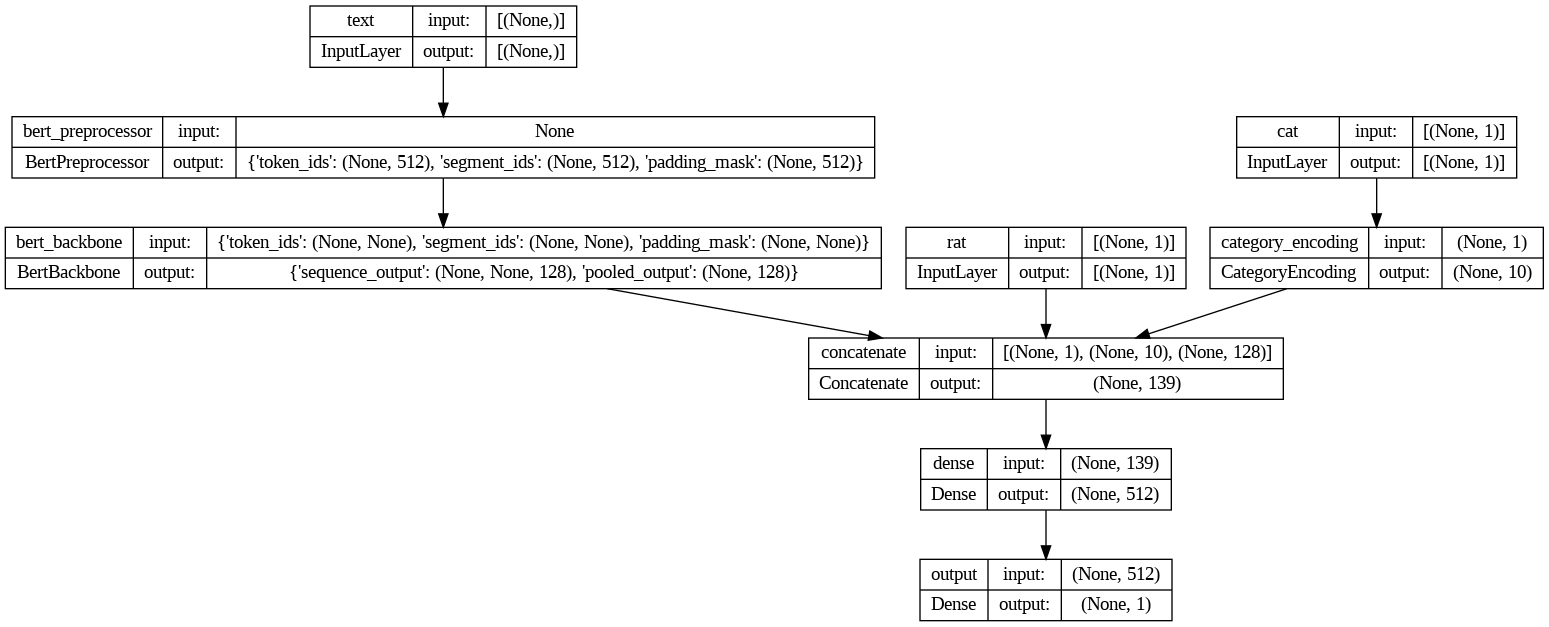

In [ ]:
keras.utils.plot_model(model2, "multi_input.png", show_shapes=True)

In [ ]:
tf.__version__


'2.12.0'